In [34]:
import pandas as pd 

df = pd.read_parquet('../data/silver/reddit/fact_posts.parquet')
df

,post_id,subreddit,author,title,selftext,url,permalink,score,num_comments,over_18,created_utc,link_flair_text,is_self,spoiler,locked,thumbnail
0,1p6tezu,COMBATFOOTAGE,Scary_Ad_4924,Jaysh al-rashideen insurgents detonate IED on ...,,https://v.redd.it/4gz5xtgbxh3g1,/r/CombatFootage/comments/1p6tezu/jaysh_alrash...,1,12,False,1.764117e+09,Video,False,False,False,https://external-preview.redd.it/dDhoN2ViamJ4a...
1,1ouacpk,CATS,Abject_Relation_3070,I do sleep really well.,,https://www.reddit.com/gallery/1ouacpk,/r/cats/comments/1ouacpk/i_do_sleep_really_well/,12,0,False,1.762870e+09,Cat Picture - OC,False,False,False,https://a.thumbs.redditmedia.com/CFoMjeOUClR27...
2,1p6d5aw,TECHNOLOGY,Exciting_Teacher6258,He Hunted Alleged Groomers on Roblox. Then the...,,https://www.wired.com/story/he-hunted-alleged-...,/r/technology/comments/1p6d5aw/he_hunted_alleg...,1177,62,False,1.764079e+09,Social Media,False,False,False,https://external-preview.redd.it/MTzJuemCC8BvJ...
3,1p6c8za,DND,seyriix,[OC] I drew my character!,I drew my first-ever DnD character who I've be...,https://i.redd.it/cak6ghngke3g1.png,/r/DnD/comments/1p6c8za/oc_i_drew_my_character/,102,4,False,1.764077e+09,Art,False,False,False,
4,1p6sxix,WOW,radiant_templar,do you think we'll be able to get the starspar...,just wondering,https://www.reddit.com/r/wow/comments/1p6sxix/...,/r/wow/comments/1p6sxix/do_you_think_well_be_a...,2,1,False,1.764116e+09,:question: Question,True,False,False,self
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7504,1p6sugb,CLASSICWOW,Tygrking,To bid farewell to anniversary I made a pvp mo...,"For context, most of these clips are against t...",https://www.youtube.com/watch?v=t5BrJeY86J0,/r/classicwow/comments/1p6sugb/to_bid_farewell...,9,3,False,1.764115e+09,Classic 20th Anniversary Realms,False,False,False,https://external-preview.redd.it/itoutgyREQo80...
7505,1p62fw8,YOUTUBE,Dependent-Line-7465,Why Is My Subscriptions Tab Not Showing?,,https://i.redd.it/rdo6qif9sb3g1.png,/r/youtube/comments/1p62fw8/why_is_my_subscrip...,6,4,False,1.764043e+09,Bug,False,False,False,https://b.thumbs.redditmedia.com/YUCn1DF69eaBN...
7506,1p6b9mt,PCMASTERRACE,TheUnlawfulGamer,Upgrade help 1440p,"Hello all, I was just wondering if it is worth...",https://www.reddit.com/r/pcmasterrace/comments...,/r/pcmasterrace/comments/1p6b9mt/upgrade_help_...,3,5,False,1.764074e+09,Tech Support,True,False,False,self
7507,1p6r0z7,CYBERPUNKGAME,iamjesskingsley,Anyone experiencing weird new bugs lately,"Some newly updated mods are breaking for me, w...",https://www.reddit.com/r/cyberpunkgame/comment...,/r/cyberpunkgame/comments/1p6r0z7/anyone_exper...,1,1,False,1.764111e+09,Discussion,True,False,False,self


In [35]:
df['score'].value_counts()

score
0        1054
1         731
2         416
3         273
4         164
         ... 
4749        1
1656        1
319         1
14843       1
3956        1
Name: count, Length: 1359, dtype: int64

<Axes: >

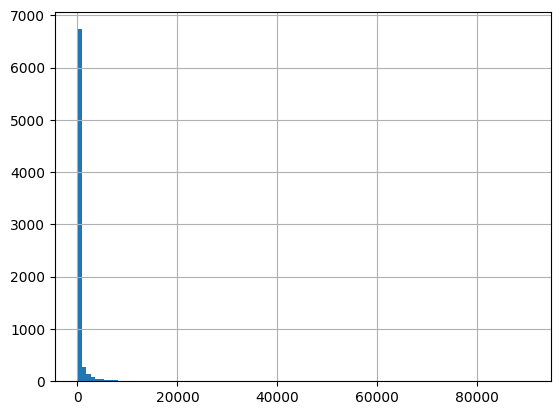

In [36]:
# df['score'] = df['score'].astype(str)
# df = df[df['score'] >= 3]
df['score'].hist(bins=100)

<Axes: xlabel='score'>

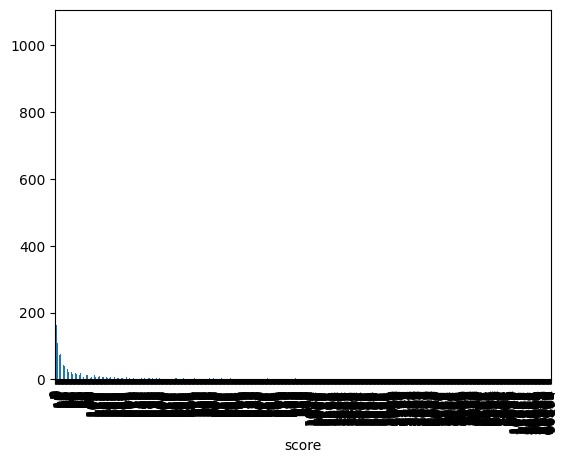

In [37]:
df["score"].value_counts().sort_index().plot(kind="bar")

In [38]:
import plotly.express as px

top10 = (
    df["score"]
    .value_counts()          # cuenta por valor exacto
    .head(10)                # top 10 más repetidos
    .reset_index()
)
top10.columns = ["score", "count"]

fig = px.bar(
    top10,
    x="score",
    y="count",
    text="count",
    title="Top 10 scores más repetidos",
)
fig.update_traces(textposition="outside")
fig.update_layout(xaxis_type="category")
fig.show()


In [46]:
import numpy as np
import pandas as pd

df["score_cat"] = pd.cut(
    df["score"],
    bins=[-np.inf, 5, 95, np.inf],
    labels=["<3", "3-99", ">=100"],
    right=False  # intervalos tipo [a,b): incluye 3 y 100 donde debe
)

# (opcional) ver el acumulado por categoría
df["score_cat"].value_counts().sort_index()



score_cat
<3       2638
3-99     2628
>=100    2243
Name: count, dtype: int64

In [47]:
import plotly.express as px

order = ["<3", "3-99", ">=100"]
counts = df["score_cat"].value_counts().reindex(order).reset_index()
counts.columns = ["score_cat", "count"]

fig = px.bar(
    counts,
    x="score_cat",
    y="count",
    text="count",
    category_orders={"score_cat": order},
    title="Distribución por categoría de score"
)
fig.update_traces(textposition="outside")
fig.update_layout(xaxis_title="Categoría", yaxis_title="Conteo")
fig.show()
